In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as sklearn_datasets

In [2]:
SEED = 0

### Support Vector Machine (separable case)

Suppose a set of two-class samples $(\mathbf{x}_{i}, y_{i})$, $y_{i} \in \pm1$, $i = 1, \dots, N$ are separable with a hyperplane; $f(x) = \mathbf{w}^{T}\mathbf{x} + w_{0}$.

\begin{eqnarray}
y_{i} = 1 \qquad \rightarrow \qquad \mathbf{w}^{T}\mathbf{x}_{i} + w_{0} & \ge & 1\\
y_{i} = -1 \qquad \rightarrow \qquad \mathbf{w}^{T}\mathbf{x}_{i} + w_{0} & \le & -1
\end{eqnarray}

The two inequalities can be expressed in a single line,

\begin{eqnarray}
y_{i} (\mathbf{w}^{T}\mathbf{x}_{i} + w_{0}) & \ge & 1
\end{eqnarray}

We want to maximize the inter-class margin $r(\mathbf{w}, w_{0})$, which is the minimum difference of the projection of $\mathbf{x}_{i}$'s onto $\mathbf{w}/|\mathbf{w}|$ between the two classes.

\begin{eqnarray}
r(\mathbf{w}, w_{0}) & = & min_{x_{i} \in C_{y_{i} = 1}} \frac{\mathbf{w}^{T}\mathbf{x}_{i} + w_{0}}{|\mathbf{w}|} - 
max_{x_{i} \in C_{y_{i} = -1}} \frac{\mathbf{w}^{T}\mathbf{x}_{i} + w_{0}}{|\mathbf{w}|} \\
& = & \frac{1}{|\mathbf{w}|} - \frac{-1}{|\mathbf{w}|}\\
& = & \frac{2}{|\mathbf{w}|}
\end{eqnarray}

In order to maximize $r(\mathbf{w}, w_{0})$, one has to minimize $|\mathbf{w}|$. Hence the optimization problem $L(\mathbf{w})$ can be expressed as below.

\begin{eqnarray}
L(\mathbf{w}) & = & \frac{1}{2}\mathbf{w}^{T}\mathbf{w}\\
min_{\mathbf{w}} L(\mathbf{w}) \quad& subject\ to & \quad y_{i} (\mathbf{w}^{T}\mathbf{x}_{i} + w_{0}) \ge 1
\end{eqnarray}

The primal problem of this constrained optimization is to find $(\mathbf{w}, \mathbf{\alpha})$ that minimizes $L(\mathbf{w}, \mathbf{\alpha})$.

\begin{eqnarray}
L(\mathbf{w}, \mathbf{\alpha}) & = & \frac{1}{2}\mathbf{w}^{T}\mathbf{w} - \sum_{i = 1}^{N} \alpha_{i} \big( y_{i} (\mathbf{w}^{T}\mathbf{x}_{i} + w_{0}) - 1\big),
\end{eqnarray}

where $\alpha_{i}$ is a Lagrange multiplier. 

The solution of this problem satisfies KKT condition:

\begin{eqnarray}
\nabla_{\mathbf{w}} L(\mathbf{w}, \mathbf{\alpha}) \bigg|_{\mathbf{w}=\mathbf{w}'}
& = & \mathbf{w}' - \sum_{i = 1}^{N} \alpha_{i} y_{i} \mathbf{x}_{i} = 0\\
\nabla_{\mathbf{w}} L(\mathbf{w}, \mathbf{\alpha}) \bigg|_{w_{0}=w'_{0}}
& = & \sum_{i = 1}^{N} \alpha_{i} y_{i} = 0\\
\alpha_{i} & \ge & 0\\
\alpha_{i} \big( y_{i}(\mathbf{w}^{T} \mathbf{x}_{i} + w_{0}) - 1\big) & = & 0
\end{eqnarray}

The last condidtion is called complementary condition yielding:
- if $y_i \big((\mathbf{w}^{T} \mathbf{x}_{i} + w_{0}) - 1\big) > 0 \rightarrow \alpha_{i} = 0$
- if $y_i \big((\mathbf{w}^{T} \mathbf{x}_{i} + w_{0}) - 1\big) = 0 \rightarrow \alpha_{i} \ge 0 \qquad$ : support  vector

The optimal solution for $\mathbf{w}$ is
\begin{eqnarray}
\mathbf{w} & = & \sum_{i = 1}^{N} \alpha_{i} y_{i} \mathbf{x}_{i}
\end{eqnarray}

$L(\mathbf{w}, \mathbf{\alpha})$に代入すると$\alpha_{i}$のみの関数となる。
\begin{eqnarray}
L(\mathbf{w}, \mathbf{\alpha}) & = & \frac{1}{2}\mathbf{w}^{T}\mathbf{w} - \sum_{i = 1}^{N} \alpha_{i} y_{i} \mathbf{w}^{T}\mathbf{x}_{i}  - w_{0}\sum_{i = 1}^{N} \alpha_{i} y_{i} + \sum_{i = 1}^{N} \alpha_{i}\\
& = & -\frac{1}{2}\mathbf{w}^{T}\mathbf{w} +\sum_{i = 1}^{N} \alpha_{i}\\
& = & \sum_{i = 1}^{N} \alpha_{i} -\frac{1}{2}\sum_{i = 1}^{N}\sum_{j = 1}^{N}\alpha_{i}\alpha_{j} y_{i} y_{j} \mathbf{x}^{T}_{i} \mathbf{x}_{j}
\end{eqnarray}

The optimal solution is:

\begin{eqnarray}
max_{\mathbf{\alpha}} L(\mathbf{\alpha}) \quad& subject\ to & \quad \sum_{i = 1}^{N} \alpha_{i} y_{i} = 0\\
&& \alpha_{i} \ge 0\\
&& \alpha_{i} \big( y_{i}(\mathbf{w}^{T} \mathbf{x}_{i} + w_{0}) - 1\big) & = & 0
\end{eqnarray}

Introducing Lagrange multipliers, the constrained optimization problem now is 

- $L(\mathbf{\alpha}) + \lambda \mathbf{\alpha}^{T}\mathbf{y} - \mathbf{\mu}^{T}\mathbf{\alpha}$

with the KKT condition 

- $\mathbf{\mu}^{T}\mathbf{\alpha} = 0$

Taking the derivative with respect to $\mathbf{\alpha}$, which is $\mathbf{0}$ at the optimal point,

- $\nabla_{\mathbf{\alpha}}L(\mathbf{\alpha}) + \lambda \mathbf{y} - \mathbf{\mu} = 0$
    - $\Rightarrow \nabla_{\mathbf{\alpha}}L(\mathbf{\alpha}) + \lambda \mathbf{y} = \mathbf{\mu} \le 0$

The $i$th data of above is 

- $y_{i}\nabla_{i}L(\mathbf{\alpha}) - y_{i} \mu_{i} = - \lambda$

Let us consider the following 4 cases.

- $y_{i} = -1$, $\alpha_{i} = 0 \Rightarrow \mu \le 0$,
    - $y_{i}\nabla_{i}L(\mathbf{\alpha}) \ge y_{i}\nabla_{i}L(\mathbf{\alpha}) - y_{i} \mu_{i} = - \lambda$
    
- $y_{i} = 1$, $\alpha_{i} = 0 \Rightarrow \mu \le 0$,
    - $y_{i}\nabla_{i}L(\mathbf{\alpha}) \le y_{i}\nabla_{i}L(\mathbf{\alpha}) - y_{i} \mu_{i} = - \lambda$
    
- $y_{i} = -1$, $\alpha_{i} > 0 \Rightarrow \mu = 0$,
    - $y_{i}\nabla_{i}L(\mathbf{\alpha}) = - \lambda$
    
- $y_{i} = 1$, $\alpha_{i} > 0 \Rightarrow \mu = 0$,
    - $y_{i}\nabla_{i}L(\mathbf{\alpha}) = - \lambda$

In summary,

- $\min_{i \in I_{-(\mathbf{y}, \mathbf{\alpha})}} y_{i}\nabla_{i}L(\mathbf{\alpha}) \ge \max_{i \in I_{+(\mathbf{y}, \mathbf{\alpha})}} y_{i}\nabla_{i}L(\mathbf{\alpha}) $

    - $\nabla_{i}L(\mathbf{\alpha}) = 1 -\sum_{j = 1}^{N}\alpha_{j} y_{i} y_{j} \mathbf{x}^{T}_{i} \mathbf{x}_{j}$
    - $I_{-(\mathbf{y}, \mathbf{\alpha})} = \{i | y_{i} = -1 \ or\ \alpha_{i} > 0\}$
    - $I_{+(\mathbf{y}, \mathbf{\alpha})} = \{i | y_{i} = +1 \ or\ \alpha_{i} > 0\}$

#### Reminder: the sign of Lagrange multiplier

- $max_{\mathbf{\alpha}} L(\mathbf{\alpha}) \quad subject\ to \quad g(\mathbf{\alpha}) \le 0$
    - Suppose the optimal solution $\mathbf{\alpha}^{*}$ is at the boundary of the feasibility region, where $g(\mathbf{\alpha}) = 0$.
        - The problem: $max_{\mathbf{\alpha}} L(\mathbf{\alpha}) + \lambda g(\mathbf{\alpha})$
            - $\nabla_{\mathbf{\alpha}}L(\mathbf{\alpha}) + \lambda \nabla_{\mathbf{\alpha}}g(\mathbf{\alpha}) = \mathbf{0}$
            - Since the optimal solution appears at the boundary, the maximima of $L(\mathbf{\alpha})$ resides at the outside of the feasibility region. Hence, $\nabla_{\mathbf{\alpha}}L(\mathbf{\alpha})$ is directed outward with respect to the boundary. Likewise, $g(\mathbf{\alpha}) < 0$ inside the feasiblity region and $g(\mathbf{\alpha}) = 0$ at the boundary, $\nabla_{\mathbf{\alpha}}g(\mathbf{\alpha})$ is also directed outward with respect to the boundary. Hence, $\nabla_{\mathbf{\alpha}}L(\mathbf{\alpha})$ and $\nabla_{\mathbf{\alpha}}g(\mathbf{\alpha})$ are parallel. In order to satisfy the condition $\nabla_{\mathbf{\alpha}}L(\mathbf{\alpha}) + \lambda \nabla_{\mathbf{\alpha}}g(\mathbf{\alpha}) = \mathbf{0}$, the following must be satisfied.
            - $\lambda \le 0$

- $min_{\mathbf{\alpha}} L(\mathbf{\alpha}) \quad subject \ to \quad g(\mathbf{\alpha}) \le 0$
    - The problem: $min_{\mathbf{\alpha}} L(\mathbf{\alpha}) + \lambda g(\mathbf{\alpha})$
        - $\nabla_{\mathbf{\alpha}}L(\mathbf{\alpha}) + \lambda \nabla_{\mathbf{\alpha}}g(\mathbf{\alpha}) = \mathbf{0}$
        - The argument for this minimization problem is the opposite of that for the maximization problem. Hence,
        - $\lambda \ge 0$

### Sequential Minimal Optimization

The objective function can be expressed in terms of a pair of $\alpha$'s: $\alpha_{i}$ and $\alpha_{j}$.

\begin{eqnarray}
L(\mathbf{\alpha}) & = &　\sum_{i = 1}^{N} \alpha_{i} -\frac{1}{2}\sum_{i = 1}^{N}\sum_{j = 1}^{N}\alpha_{i}\alpha_{j} y_{i} y_{j} \mathbf{x}^{T}_{i} \mathbf{x}_{j}\\
& = & -\frac{1}{2}\alpha_{i}^{2}\mathbf{x}^{T}_{i}\mathbf{x}_{i} -\frac{1}{2}\alpha_{j}^{2}\mathbf{x}^{T}_{j}\mathbf{x}_{j}\\
&& -\alpha_{i}\alpha_{j}y_{i} y_{j}\mathbf{x}^{T}_{i}\mathbf{x}_{j}\\
&& +\alpha_{i}\bigg(1 - y_{i}\mathbf{x}^{T}_{i} \sum_{k \neq i,j}\alpha_{k}y_{k}\mathbf{x}_{k} \bigg) +\alpha_{j}\bigg(1 - y_{j}\mathbf{x}^{T}_{j} \sum_{k \neq i,j}\alpha_{k}y_{k}\mathbf{x}_{k} \bigg)\\
&& +\sum_{k \neq i,j}\alpha_{k} -\frac{1}{2}\sum_{k \neq i,j}^{N}\sum_{l \neq i,j}^{N}\alpha_{k}\alpha_{l} y_{k}y_{l} \mathbf{x}^{T}_{k} \mathbf{x}_{l}\\
& = & A\alpha_{i}^{2} + B\alpha_{j}^{2} + C\alpha_{i}\alpha_{j} + D\alpha_{i} + E\alpha_{j} + F
\end{eqnarray}


The constraint $\sum_{i = 1}^{N} \alpha_{i} y_{i} = 0$ can also be expressed in terms of a pair of $\alpha$'s: $\alpha_{i}$ and $\alpha_{j}$. Note $y_{i}^{2} = 1$.

\begin{eqnarray}
0 = \sum_{i = 1}^{N} \alpha_{i} y_{i} & = & \alpha_{i}y_{i} + \alpha_{j}y_{j} + \sum_{k \neq i,j}^{N} \alpha_{k} y_{k}\\
& \equiv & \alpha_{i}y_{i} + \alpha_{j}y_{j} + G\\
\Rightarrow \qquad \alpha_{j} & = & -y_{j}(\alpha_{i}y_{i} + G)
\end{eqnarray}

Substitute this to the objective function:
\begin{eqnarray}
Ba_{j}^{2} & = & B y_{j}^{2}(\alpha_{i}y_{i} + G)^{2}\\
& = & B (\alpha_{i}^{2} + 2\alpha_{i}y_{i}G + G^{2})\\
C\alpha_{i}\alpha_{j} & = & -C \alpha_{i}y_{j}(\alpha_{i}y_{i} + G)\\
& = & -C y_{i}y_{j}\alpha_{i}^{2} - CG\alpha_{i}y_{j}
\end{eqnarray}

Overall,

\begin{eqnarray}
L(\mathbf{\alpha}) & = & A\alpha_{i}^{2} + B\alpha_{j}^{2} + C\alpha_{i}\alpha_{j} + D\alpha_{i} + E\alpha_{j} + F\\
& = & A\alpha_{i}^{2} + B \alpha_{i}^{2} + 2 By_{i}G \alpha_{i} + G^{2}
-C y_{i}y_{j}\alpha_{i}^{2} - CG\alpha_{i}y_{j} + D\alpha_{i} - Ey_{i}y_{j}\alpha_{i} + Gy_{i} + F\\
& = &  (A + B - C y_{i}y_{j})\alpha_{i}^{2} + (2 BGy_{i} - CGy_{j} + D - Ey_{i}y_{j})\alpha_{i} + G^{2} + Gy_{i} + F\\
& \equiv &  \tilde{A}\alpha_{i}^{2} + 2\tilde{B}\alpha_{i} + \tilde{C}
\end{eqnarray}


The objective function is minimized when

\begin{eqnarray}
\alpha_{i} & = & -\frac{\tilde{B}}{2\tilde{A}}\\
\tilde{A} & = & -\frac{1}{2}|\mathbf{x}_{i} - \mathbf{x}_{j}|^{2}\\
\tilde{B} & = & 1 - y_{i}y_{j} + y_{i}(\mathbf{x}_{i} - \mathbf{x}_{j})^{T}\bigg(\mathbf{x}_{j} \sum_{k \neq i,j}^{N} \alpha_{k} y_{k} - \sum_{k \neq i,j}^{N} \alpha_{k} y_{k}\mathbf{x}_{k}\bigg)
\end{eqnarray}

In [3]:
import time

In [4]:
time.sleep(2)

In [31]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
import time

class SVM(BaseEstimator, ClassifierMixin):
    """ SVM classifier"""
    def fit(self, X, y):
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)

        # Store the classes seen during fit
        self.classes_ = unique_labels(y)

        self.X_, self.y_ = X, y
        self._initialize_values()
        eps = 1e-10
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))
        while True:
            i, j = self._select_pair_idx()
            if self.ydLda1_[i] >= self.ydLda1_[j] - eps:
                print("done")
                break
            ai, aj = self._get_alpha(i, j)
            self.a_[i] = ai
            self.a_[j] = aj
            self._update_alpha()
            x0, y0 = self.plot_iteration(ax)

        ax.plot(x0, y0, 'g', alpha=1.0, linewidth=4)
        plt.show()
            
        self.ws = self.get_ws()
        self.w0 = self.get_w0()
        return self

    def predict(self, X):
        # Check is fit had been called
        check_is_fitted(self)

        # Input validation
        X = check_array(X)
        closest = np.argmin(euclidean_distances(X, self.X_), axis=1)
        return self.y_[closest]

    def _initialize_values(self):
        self.n_ = self.y_.shape[0]
        self.a_ = np.zeros(self.n_)
        self.ay1_ = self._get_ay1()
        self.ayx2_ = self._get_ayx2()
        self.yx3_ = self._get_yx3()
        self.yy2_ = self._get_yy2()
        self.xdist2_ = self._get_xdist2()
        self.dLda1_ = self._get_dLda1()
        self.ydLda1_ = self._get_ydLda1()

    def _update_alpha(self):
        self.ay1_ = self._get_ay1()
        self.ayx2_ = self._get_ayx2()
        self.dLda1_ = self._get_dLda1()
        self.ydLda1_ = self._get_ydLda1()

    def _select_pair_idx(self):
        filtm = (self.y_ < 0) | (self.a_ > 0)
        i = np.where((self.ydLda1_ == self.ydLda1_[filtm].min()) & filtm)[0]
        i = np.random.choice(i)
            
        filtp = (self.y_ > 0) | (self.a_ > 0)
        j = np.where((self.ydLda1_ == self.ydLda1_[filtp].max()) & filtp)[0]
        j = np.random.choice(j)
        return i, j
        
    def _get_yx3(self):
        return self.y_[:, np.newaxis, np.newaxis] * self.X_[np.newaxis, :, :]

    def _get_ay1(self):
        return self.a_ * self.y_

    def _get_ayx2(self):
        return self.ay1_[:, np.newaxis] * self.X_

    def _get_xdist2(self):
        return ((self.X_[:, np.newaxis, :] - self.X_[np.newaxis, :, :]) ** 2).sum(axis=2)

    def _get_yy2(self):
        return self.y_[:, np.newaxis] * self.y_[np.newaxis, :]

    def _get_dLda1(self):
        idx = np.arange(self.n_)
        yx = self.yx3_[idx, idx, :]
        return 1 - np.dot(yx, self.ayx2_.T).sum(axis=1)

    def _get_ydLda1(self):
        return self.y_ * self.dLda1_

    def _get_numerator(self, i, j, idx):
        z1 = self.yx3_[i, i, :] - self.yx3_[i, j, :]
        z2 = self.ay1_[idx].sum() * self.X_[j, :] - self.ayx2_[idx, :].sum(axis=0)
        return 1 - self.yy2_[i, j] + np.dot(z1, z2)

    def _get_alpha(self, i, j):
        idx = np.delete(np.arange(self.n_), [i, j]).astype(int)
        ai = self._get_numerator(i, j, idx) / self.xdist2_[i, j]
        if ai < 0:
            ai = 0

        aj = - self.y_[j] * (ai * self.y_[i] + self.ay1_[idx].sum())
        if aj < 0:
            aj = 0
            ai = - self.y_[i] * (aj * self.y_[j] + np.dot(self.a_[idx], self.y_[idx]))

        return ai, aj
    
    def get_ws(self):
        return np.dot(self.ay1_, self.X_)
        
    def get_w0(self):
        idx = self.a_ > 0
        ay = self.ay1_[idx]
        x = self.X_[idx, :]
        return (self.y_[idx] -\
                np.dot(x, self.ws))\
                .sum()\
                / len(idx[idx])
    
    def plot_iteration(self, ax):
        colors = ["r" if y == 1 else "b" for y in self.y_]

        self.ws = self.get_ws()
        self.w0 = self.get_w0()

        w1 = self.ws[0] / self.ws[1]
        w0 = self.w0 / self.ws[1]
        x0 = [self.X_[:,0].min(), self.X_[:,0].max()]
        y0 = [-x0[0]*w1-w0, -x0[1]*w1-w0]
        filt = self.a_ > 0
        
        ax.scatter(self.X_[:, 0], self.X_[:, 1], c=colors, s=20, alpha=0.5)
        ax.scatter(self.X_[filt, 0], self.X_[filt, 1], marker="x", c="g", s=100, alpha=0.4)
        ax.plot(x0, y0, 'g', alpha=0.2)
        ax.set_xticks([])
        ax.set_yticks([])
#         ax.set_title(f"seed = {seed}")
        return x0, y0
        

done


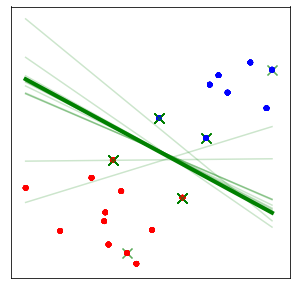

SVM()

In [47]:
seed = 6
np.random.seed(5)
data = sklearn_datasets.make_biclusters(shape=(n, 2),
                                            n_clusters=2,
                                            noise=10.0,
                                            random_state=seed)
X = 0.1 * data[0]
y = data[1][0].astype(int)
y[y == 0] = -1
colors = ["r" if y_ == 1 else "b" for y_ in y]

svm = SVM()
svm.fit(X, y)

done


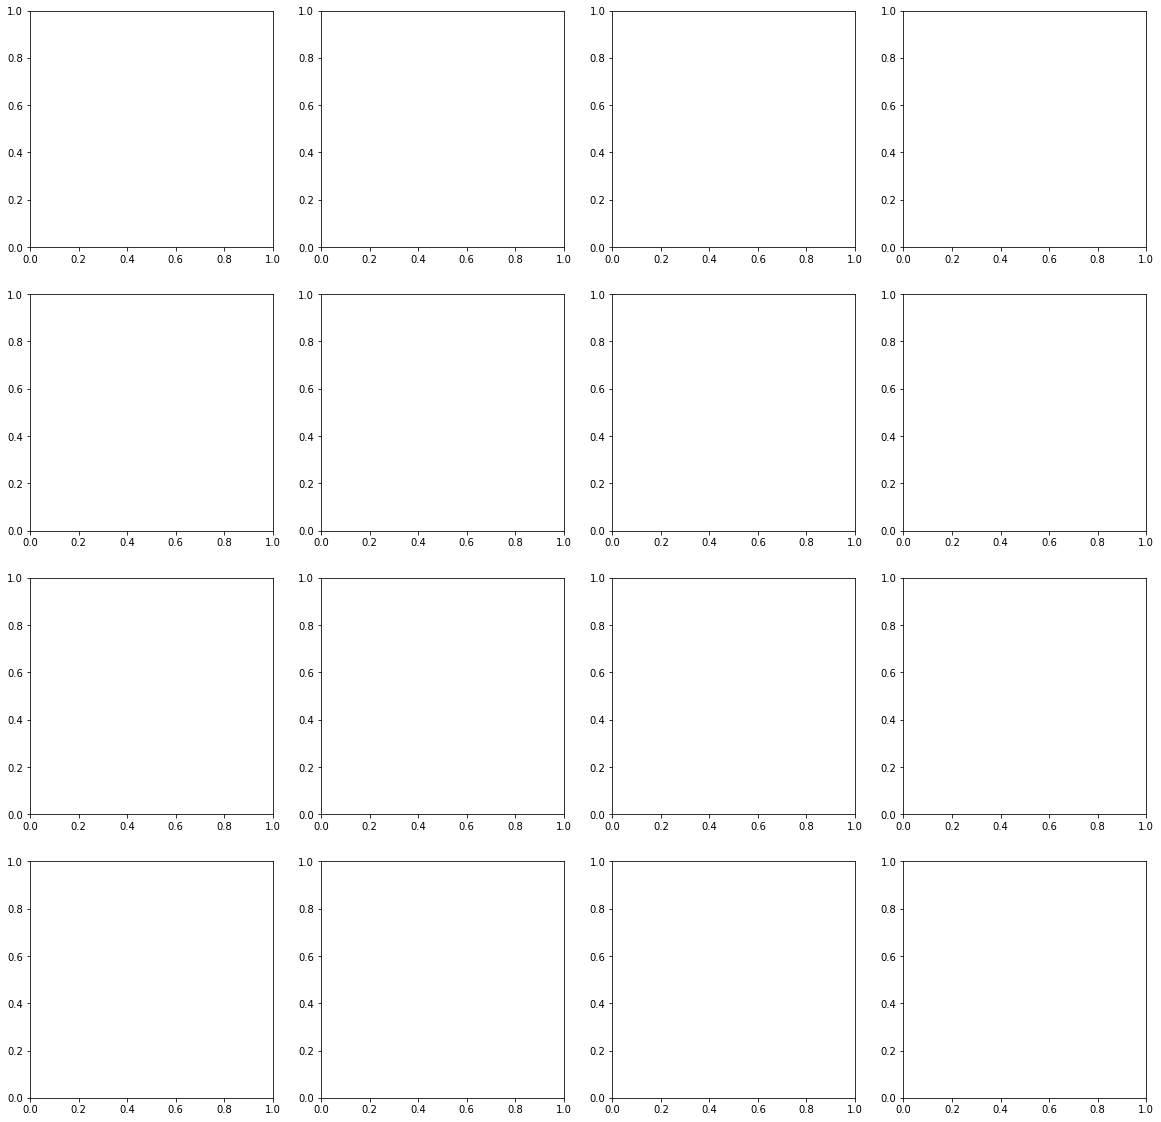

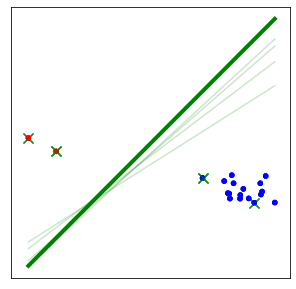

done


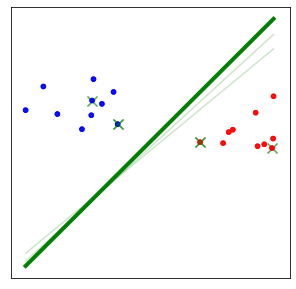

done


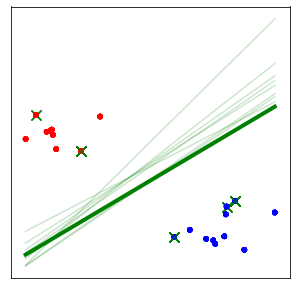

done


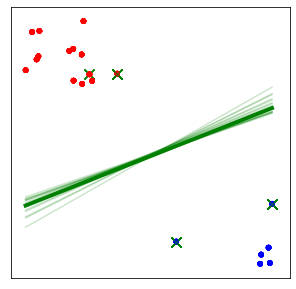

done


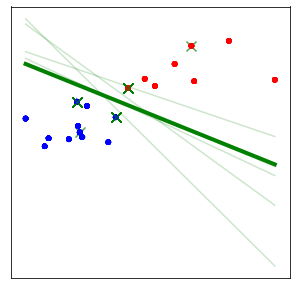

done


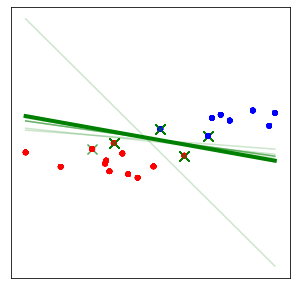

done


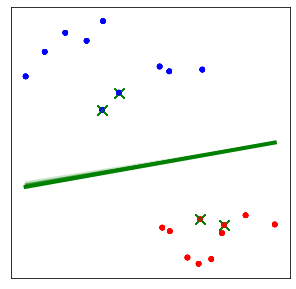

done


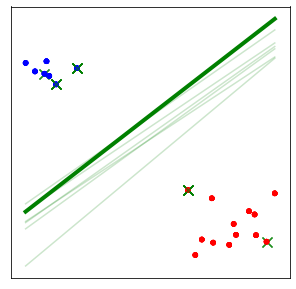

done


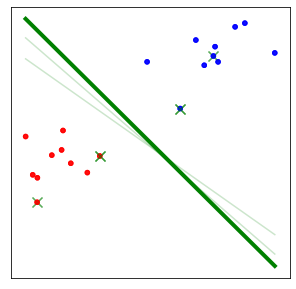

done


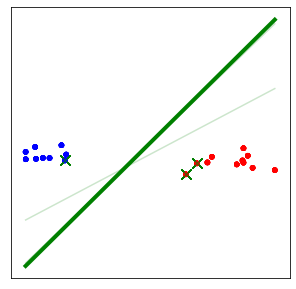

done


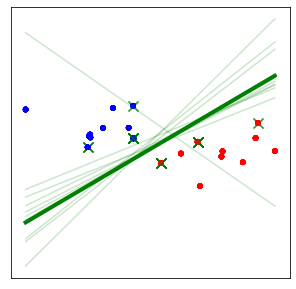

done


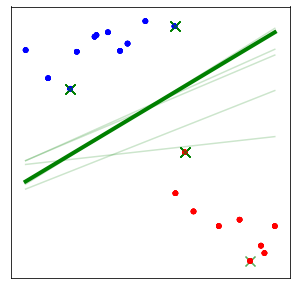

done


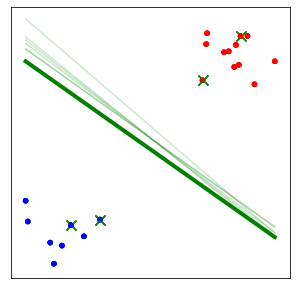

done


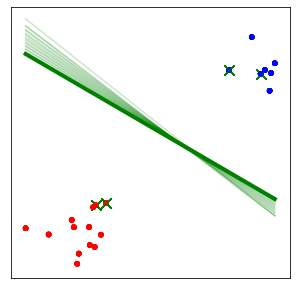

done


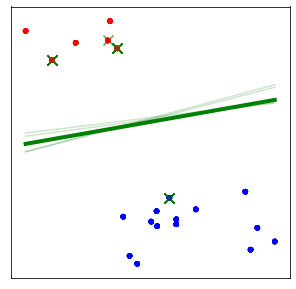

done


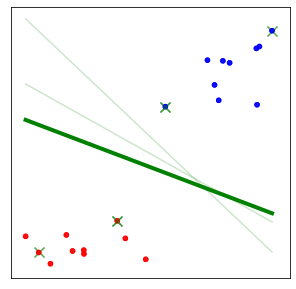

In [48]:
n = 20
seeds = np.arange(16) + 1
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
for i, seed in enumerate(seeds):
    ii = i // 4
    jj = i % 4
    ax = axs[ii, jj]
    data = sklearn_datasets.make_biclusters(shape=(n, 2),
                                            n_clusters=2,
                                            noise=10.0,
                                            random_state=seed)
    X = 0.1 * data[0]
    y = data[1][0].astype(int)
    y[y == 0] = -1
    colors = ["r" if y_ == 1 else "b" for y_ in y]

    svm = SVM()
    svm.fit(X, y)

    w1 = svm.ws[0] / svm.ws[1]
    w0 = svm.w0 / svm.ws[1]
    x0 = [X[:,0].min(), X[:,0].max()] 
    filt = svm.a_ > 0

    ax.scatter(X[:, 0], X[:, 1], c=colors, s=20, alpha=0.5)
    ax.scatter(X[filt, 0], X[filt, 1], marker="x", c="g", s=100, alpha=0.4)
    ax.plot(x0, [-x0[0]*w1-w0, -x0[1]*w1-w0], 'g')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"seed = {seed}")

done


Text(0.5, 1.0, 'seed = 16')

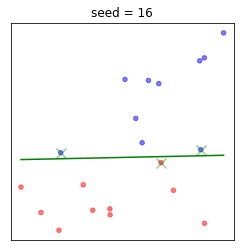

In [625]:
data = sklearn_datasets.make_biclusters(shape=(n, 2),
                                            n_clusters=2,
                                            noise=30.0,
                                            random_state=seed)
X = 0.1 * data[0]
y = data[1][0].astype(int)
y[y == 0] = -1
colors = ["r" if y_ == 1 else "b" for y_ in y]

svm = SVM()
svm.fit(X, y)

w1 = svm.ws[0] / svm.ws[1]
w0 = svm.w0 / svm.ws[1]
x0 = [X[:,0].min(), X[:,0].max()] 
filt = svm.a_ > 0

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.scatter(X[:, 0], X[:, 1], c=colors, s=20, alpha=0.5)
ax.scatter(X[filt, 0], X[filt, 1], marker="x", c="g", s=100, alpha=0.4)
ax.plot(x0, [-x0[0]*w1-w0, -x0[1]*w1-w0], 'g')
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(f"seed = {seed}")

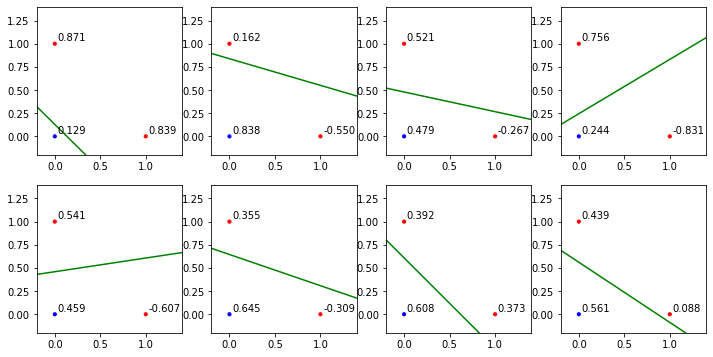

In [47]:
def ywx(x, y, w, w0):
    return y * (np.dot(w, x) + w0)

X = np.array([[0, 0],
              [1, 0],
              [0, 1]])
y = np.array([-1, 1, 1])
x0 = (-0.2, 1.4)
colors = ["r" if y_ == 1 else "b" for y_ in y]

fig, axss = plt.subplots(2, 4, figsize=(12, 6))

for axs in axss:
    for ax in axs:
        w = np.random.normal(loc=0, scale=0.5, size=(2,))
        w[1] = 1
        w0 = np.random.normal(loc=-0.5, scale=0.2, size=1)
        ax.plot(x0, [-x0[0]*w[0]-w0, -x0[1]*w[0]-w0], 'g')
        ax.scatter(X[:, 0], X[:, 1], c=colors, s=10)
        for i in range(3):
            val = ywx(X[i, :], y[i], w, w0)[0]
            ax.annotate("{:1.3f}".format(val), xy = X[i, :]+0.03, size = 10)
            ax.set_xlim(x0)
            ax.set_ylim(x0)